In [1]:
import pandas as pd
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import warnings
warnings.simplefilter('ignore')

# Loading Data

In [2]:
# Loading the Dataset
df1 = pd.read_csv('airbnb_nyc.csv')
df1.head()

,Unnamed: 0,id,host_id,host_since,host_response_time,host_response_rate,host_acceptance_rate,Superhost,host_neighbourhood,host_listings_count,...,minimum_nights,maximum_nights,availability_365,calendar_last_scraped,number_of_reviews,Review_Rating,review_scores_cleanliness,review_scores_value,instant_bookable,Review Rating
0,0,918239,4930847,2/1/2013,a few days or more,20%,0,No,Williamsburg,1,...,1,90,64,12/6/2019,114,95,9,10,f,4th Quartile
1,1,918426,4932354,2/1/2013,within an hour,100%,0,Yes,Prospect Heights,4,...,3,14,134,12/6/2019,80,93,9,10,f,4th Quartile
2,2,919491,4938247,2/2/2013,within a day,100%,0,No,Park Slope,1,...,2,180,0,12/5/2019,175,93,9,9,f,4th Quartile
3,3,919830,1895793,3/10/2012,within an hour,100%,0,Yes,Chelsea,1,...,2,7,167,12/6/2019,176,96,10,10,t,4th Quartile
4,4,919955,794794,7/8/2011,within a day,67%,0,No,Upper East Side,1,...,14,1124,354,12/6/2019,11,96,9,9,f,4th Quartile


# Data Exploration

In [3]:
df1.host_neighbourhood.nunique()

432

In [4]:
# Dumping all irrelevant columns
df = df1.drop(['id','neighbourhood', 'Review Rating','host_since', 'host_response_time','amenities',
               'street', 'host_verifications','calendar_last_scraped','host_identity_verified',  'host_has_profile_pic', 
               'neighbourhood_cleansed',  'instant_bookable','host_acceptance_rate', 'host_id', 'host_listings_count', 
               'host_total_listings_count', 'minimum_nights', 'maximum_nights', 'property_type', 'Unnamed: 0'], axis = 1)

In [5]:
# Checking for nulls 
df.isnull().sum()

host_response_rate           0
Superhost                    0
host_neighbourhood           0
Borough                      0
latitude                     0
longitude                    0
Room_Type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
Price                        0
weekly_price                 0
monthly_price                0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
availability_365             0
number_of_reviews            0
Review_Rating                0
review_scores_cleanliness    0
review_scores_value          0
dtype: int64

In [6]:
# inspeting the all the columns datatypes
df.head().T

,0,1,2,3,4
host_response_rate,20%,100%,100%,100%,67%
Superhost,No,Yes,No,Yes,No
host_neighbourhood,Williamsburg,Prospect Heights,Park Slope,Chelsea,Upper East Side
Borough,Brooklyn,Brooklyn,Brooklyn,Manhattan,Manhattan
latitude,40.7016,40.6785,40.6767,40.746,40.764
longitude,-73.9435,-73.9701,-73.9792,-73.9991,-73.9639
Room_Type,Private room,Private room,Private room,Private room,Entire home/apt
accommodates,1,2,4,2,3
bathrooms,1,1,1,1,1
bedrooms,1,1,1,1,1


In [7]:
# Transforming and casting to numerical, non numerical column data type
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(int)
df['extra_people'] = df['extra_people'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df['weekly_price'] = df['weekly_price'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df['monthly_price'] = df['monthly_price'].str.replace('$', '').str.replace(',', '').str.strip().astype(float)
df['bathrooms'] = df['bathrooms'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(float)

In [9]:
# checking visually the columns data type
df.head().T

,0,1,2,3,4
host_response_rate,20,100,100,100,67
Superhost,No,Yes,No,Yes,No
host_neighbourhood,Williamsburg,Prospect Heights,Park Slope,Chelsea,Upper East Side
Borough,Brooklyn,Brooklyn,Brooklyn,Manhattan,Manhattan
latitude,40.7016,40.6785,40.6767,40.746,40.764
longitude,-73.9435,-73.9701,-73.9792,-73.9991,-73.9639
Room_Type,Private room,Private room,Private room,Private room,Entire home/apt
accommodates,1,2,4,2,3
bathrooms,1,1,1,1,1
bedrooms,1,1,1,1,1


# Data Exploration

In [10]:
# checking the columns data type
df.dtypes

host_response_rate             int32
Superhost                     object
host_neighbourhood            object
Borough                       object
latitude                     float64
longitude                    float64
Room_Type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                           int64
bed_type                      object
Price                        float64
weekly_price                 float64
monthly_price                float64
security_deposit               int64
cleaning_fee                   int64
guests_included                int64
extra_people                 float64
availability_365               int64
number_of_reviews              int64
Review_Rating                  int64
review_scores_cleanliness      int64
review_scores_value            int64
dtype: object

In [11]:
# Removinf price outliers
df = df[df['Price'] <300]
len(df)

46610

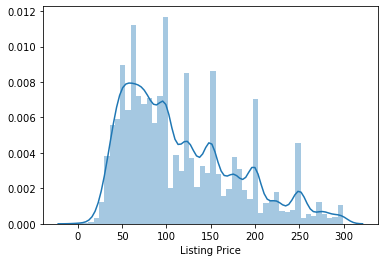

In [12]:
# Plotting the distribution of the price
ax = sb.distplot(df['Price'], axlabel='Listing Price')

Text(0.5, 0.98, 'Price by Borough')

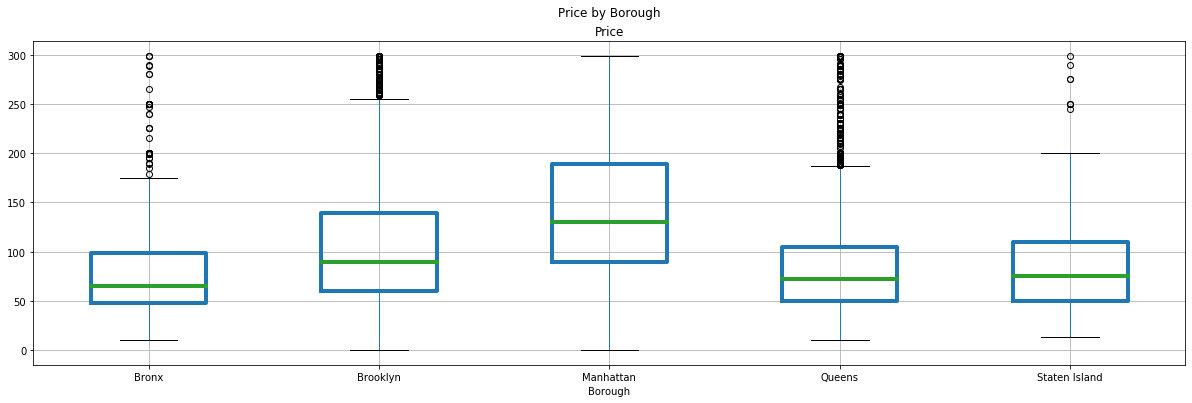

In [13]:
# Price Box plot per Borough
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

df.boxplot(column='Price', by='Borough', boxprops=boxprops,
                medianprops=medianprops, figsize=(20,6))

# setting title
plt.suptitle("Price by Borough")

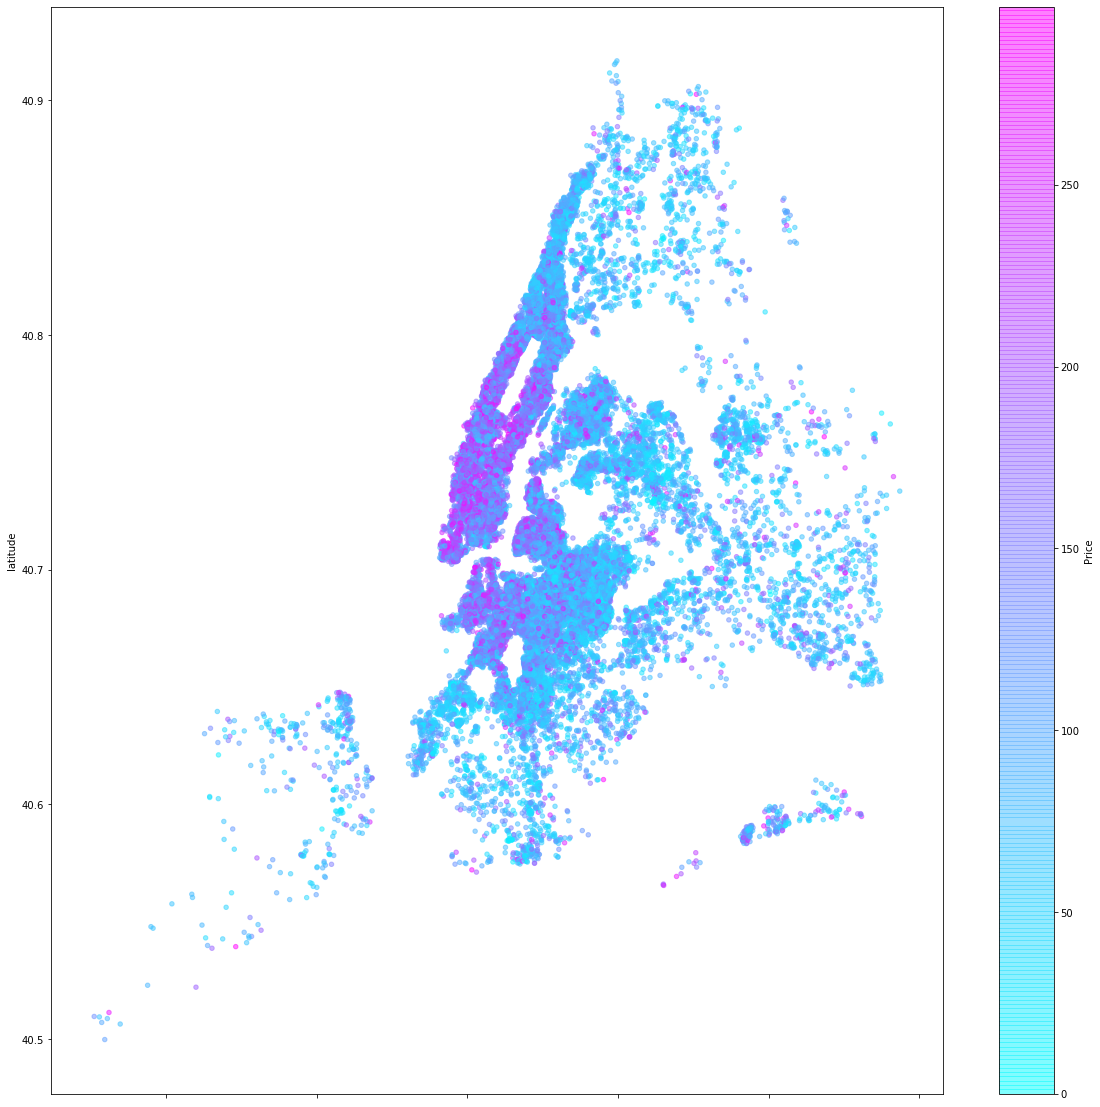

In [14]:
#  Plotting the distribution of price spatially
df.plot.scatter(x='longitude', y = 'latitude', c='Price', figsize=(20,20), cmap='cool', alpha=0.5 )

From the graph above, we can see spatial distribution pattern aroubnd midtwom Manhattan, as hotspot area as 
we get far away from it the prices tend to drop. 

In [15]:
# Calculating the Distance from Time Square 
import geopy.distance

cols =['latitude', 'longitude']
df['location'] = df[cols].apply(lambda row: ', '.join(row.values.astype(str)), axis=1)
df['location'] =  df['location'].apply(lambda row: tuple(map(float, row.split(', '))))

# Time Square Location the center of the high priced area
coords = (40.758896, -73.985130)
df['distance'] =  df['location'].apply(lambda row: geopy.distance.vincenty(coords, row).miles)
# print geopy.distance.vincenty(coords_1, coords_2).km
df['distance']

0        4.518910
1        5.602132
2        5.683554
3        1.148927
4        1.170857
           ...   
50594    6.538442
50595    2.457599
50596    1.888921
50597    1.432552
50598    5.804301
Name: distance, Length: 46610, dtype: float64

In [16]:
# Creating coorelation between all features
corr = df.corr()
corr

,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,Price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,Review_Rating,review_scores_cleanliness,review_scores_value,distance
host_response_rate,1.000000,-0.018760,0.114207,0.138057,0.059633,0.065948,0.124614,0.038314,-0.061362,0.015191,0.057653,0.215200,0.147843,0.129872,0.458744,0.295358,0.224282,0.239961,0.220803,0.104191
latitude,-0.018760,1.000000,0.086092,-0.053971,-0.078936,-0.085224,-0.062432,0.070462,-0.003372,0.011609,0.019685,0.019853,-0.066232,-0.000737,-0.012162,-0.012705,-0.029733,-0.029918,-0.032169,-0.412091
longitude,0.114207,0.086092,1.000000,0.032819,0.047528,0.082751,0.046306,-0.302731,-0.078124,-0.067350,-0.080260,-0.163337,0.059463,0.028135,0.097166,0.052299,0.032642,0.040895,0.038587,0.542589
accommodates,0.138057,-0.053971,0.032819,1.000000,0.144685,0.562617,0.712081,0.471891,0.060748,0.064362,0.116079,0.360762,0.545974,0.093041,0.119466,0.106381,0.078327,0.086256,0.075931,0.073022
bathrooms,0.059633,-0.078936,0.047528,0.144685,1.000000,0.221165,0.186982,-0.009529,0.000071,-0.010726,0.003372,0.036448,0.078075,0.014322,0.093321,-0.019791,-0.035353,-0.038059,-0.032907,0.073632
bedrooms,0.065948,-0.085224,0.082751,0.562617,0.221165,1.000000,0.555902,0.227009,0.055295,0.046481,0.060825,0.200963,0.364198,0.071003,0.053195,0.037889,0.019635,0.022294,0.021597,0.141748
beds,0.124614,-0.062432,0.046306,0.712081,0.186982,0.555902,1.000000,0.303221,0.049420,0.050740,0.082846,0.265699,0.443992,0.089939,0.128835,0.082761,0.057419,0.063239,0.056361,0.103005
Price,0.038314,0.070462,-0.302731,0.471891,-0.009529,0.227009,0.303221,1.000000,0.137855,0.116567,0.186526,0.456689,0.287591,0.057103,0.052871,-0.020866,-0.010716,-0.003029,-0.025784,-0.366602
weekly_price,-0.061362,-0.003372,-0.078124,0.060748,0.000071,0.055295,0.049420,0.137855,1.000000,0.612369,0.089622,0.086033,0.076475,0.067013,0.000913,0.121614,0.068562,0.065116,0.065221,-0.058092
monthly_price,0.015191,0.011609,-0.067350,0.064362,-0.010726,0.046481,0.050740,0.116567,0.612369,1.000000,0.149676,0.137440,0.069800,0.066923,0.082407,0.148164,0.080956,0.080374,0.075012,-0.067020


Text(0.5, 1, 'Correlation HeatMap')

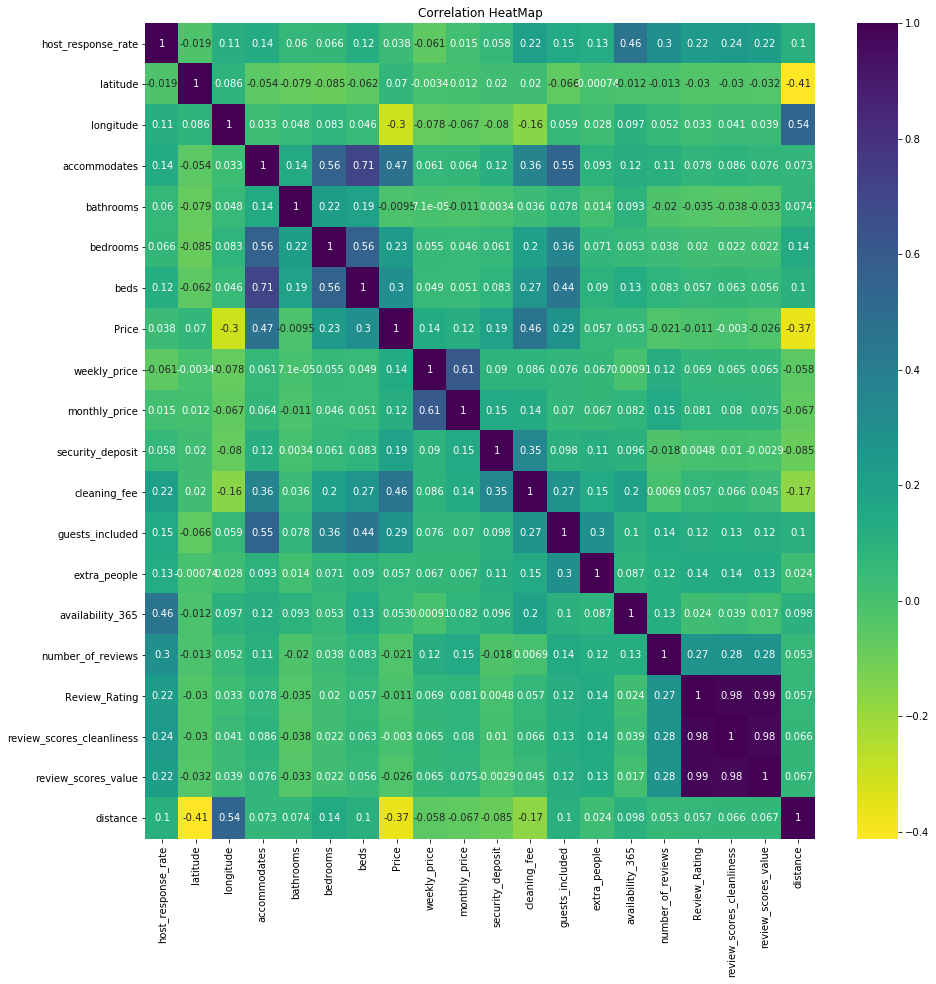

In [17]:
plt.figure(figsize=(15, 15))
corr = df.corr()
sb.heatmap(corr, annot=True, cmap = 'viridis_r')
plt.title('Correlation HeatMap')

Text(0.5, 1.0, 'Price vs distance from Time Square')

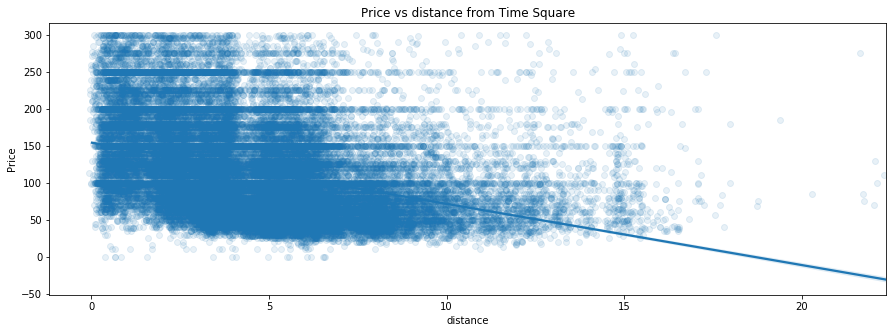

In [18]:
# Price vs Distance from Time Square

plt.figure(figsize=(15, 5))
sb.regplot(data = df, x = "distance", y = 'Price', x_jitter = 0.1, 
            scatter_kws = {'alpha': 0.1})
plt.title('Price vs distance from Time Square')

# Borough Exploratory and Analysis

In [19]:
Manhattan = df[df['Borough'] == 'Manhattan']
Brooklyn= df[df['Borough'] == 'Brooklyn']
Bronx = df[df['Borough'] == 'Bronx']
Queens = df[df['Borough'] == 'Queens']
StatenIsland = df[df['Borough'] == 'Staten Island']

In [20]:
Queens

,host_response_rate,Superhost,host_neighbourhood,Borough,latitude,longitude,Room_Type,accommodates,bathrooms,bedrooms,...,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,Review_Rating,review_scores_cleanliness,review_scores_value,location,distance
16,100,No,Jamaica,Queens,40.70715,-73.81468,Entire home/apt,2,1.0,1.0,...,54,1,15.0,207,88,93,9,9,"(40.70715, -73.81468000000001)",9.633027
24,0,No,Flushing,Queens,40.75444,-73.83057,Private room,2,1.0,1.0,...,13,1,15.0,0,75,94,10,9,"(40.75444, -73.83057)",8.115739
49,100,Yes,Ridgewood,Queens,40.70990,-73.91509,Entire home/apt,2,1.0,1.0,...,25,2,100.0,311,80,95,10,10,"(40.7099, -73.91509)",4.994522
59,100,No,Jackson Heights,Queens,40.76356,-73.88850,Entire home/apt,4,1.0,1.0,...,55,2,15.0,1,165,90,9,9,"(40.76356, -73.8885)",5.080128
73,100,No,Astoria,Queens,40.75751,-73.91678,Entire home/apt,2,1.0,1.0,...,60,1,10.0,318,292,88,9,9,"(40.757509999999996, -73.91678)",3.587583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,70,No,Flushing,Queens,40.76014,-73.81146,Private room,2,1.0,1.0,...,10,1,20.0,353,43,92,9,9,"(40.76014, -73.81146)",9.112648
50516,0,No,Astoria,Queens,40.76488,-73.92970,Entire home/apt,2,1.0,1.0,...,100,2,25.0,126,0,0,0,0,"(40.76488, -73.9297)",2.937405
50564,100,Yes,Flushing,Queens,40.75088,-73.81029,Private room,1,1.5,1.0,...,0,1,0.0,0,128,97,10,10,"(40.75088, -73.81029000000001)",9.190927
50565,100,Yes,Flushing,Queens,40.75250,-73.81126,Entire home/apt,3,1.0,0.0,...,0,2,10.0,312,337,94,9,10,"(40.7525, -73.81126)",9.133928


In [21]:
# Plotting the distribution of the price in the 5 boroughs
def plot_histBorough(a):
    x1 = Manhattan[a]
    x2 = Brooklyn[a]
    x3 = Queens[a]
    x4 = Bronx[a]
    x5 = StatenIsland[a]
    
    fig, axs = plt.subplots(3, 2, figsize=(20,10))   
    axs[0, 0].hist(x1, color = 'r', bins=50)
    axs[0, 0].set_title(f'Manhattan {a}')
    axs[0, 1].hist(x2, color = 'g', bins=50)
    axs[0, 1].set_title(f'Brooklyn {a}')
    axs[1, 0].hist(x3, color='b', bins=50)
    axs[1, 0].set_title(f'Queens {a}')
    axs[1, 1].hist(x4, color = 'k',  bins=50)
    axs[1, 1].set_title(f'Bronx {a}')
    axs[2, 0].hist(x5, color = 'y',  bins=50)
    axs[2, 0].set_title(f'Staten Island {a}')
    return plt.show

<function matplotlib.pyplot.show(*args, **kw)>

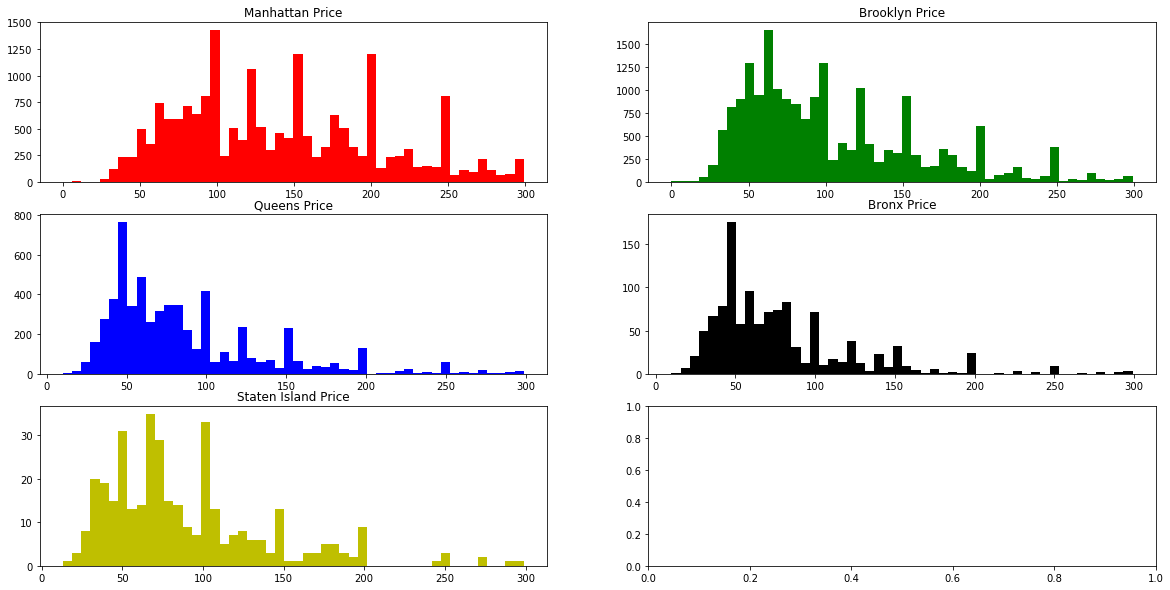

In [22]:
plot_histBorough('Price')

In [23]:
# Plotting scatter plot between the price and the distace from Time Square in the 5 borough
def plot_borough(a, b):
    x1 = Manhattan[a]
    y1 = Manhattan[b]
    x2 = Brooklyn[a]
    y2 = Brooklyn[b]
    x3 = Queens[a]
    y3 = Queens[b]
    x4 = Bronx[a]
    y4 = Bronx[b]
    x5 = StatenIsland[a]
    y5 = StatenIsland[b]

    fig, axs = plt.subplots(3, 2, figsize=(20,10))   
    axs[0, 0].scatter(x1, y1, color = 'r', alpha = 0.2)
    z = np.polyfit(x1, y1, 1)
    p = np.poly1d(z)
    axs[0, 0].plot(x1,p(x1),"k--")
    axs[0, 0].set_title(f'Manhattan {a} vs {b}')
    axs[0, 1].scatter(x2, y2, color = 'g', alpha=0.2)
    z = np.polyfit(x2, y2, 1)
    p = np.poly1d(z)
    axs[0, 1].plot(x2,p(x2),"k--")
    axs[0, 1].set_title(f'Brooklyn {a} vs {b}')
    axs[1, 0].scatter(x3, y3, color='b', alpha=0.2)
    z = np.polyfit(x3, y3, 1)
    p = np.poly1d(z)
    axs[1, 0].plot(x3,p(x3),"k--")
    axs[1, 0].set_title(f'Queens {a} vs {b}')
    axs[1, 1].scatter(x4, y4, color = 'k',  alpha=0.2)
    z = np.polyfit(x4, y4, 1)
    p = np.poly1d(z)
    axs[1, 1].plot(x4,p(x4),"k--")
    axs[1, 1].set_title(f'Bronx {a} vs {b}')
    axs[2, 0].scatter(x5, y5, color = 'y',  alpha=0.2)
    z = np.polyfit(x5, y5, 1)
    p = np.poly1d(z)
    axs[2, 0].plot(x5,p(x5),"k--")
    axs[2, 0].set_title(f'Staten Island {a} vs {b}')
    return plt.show

<function matplotlib.pyplot.show(*args, **kw)>

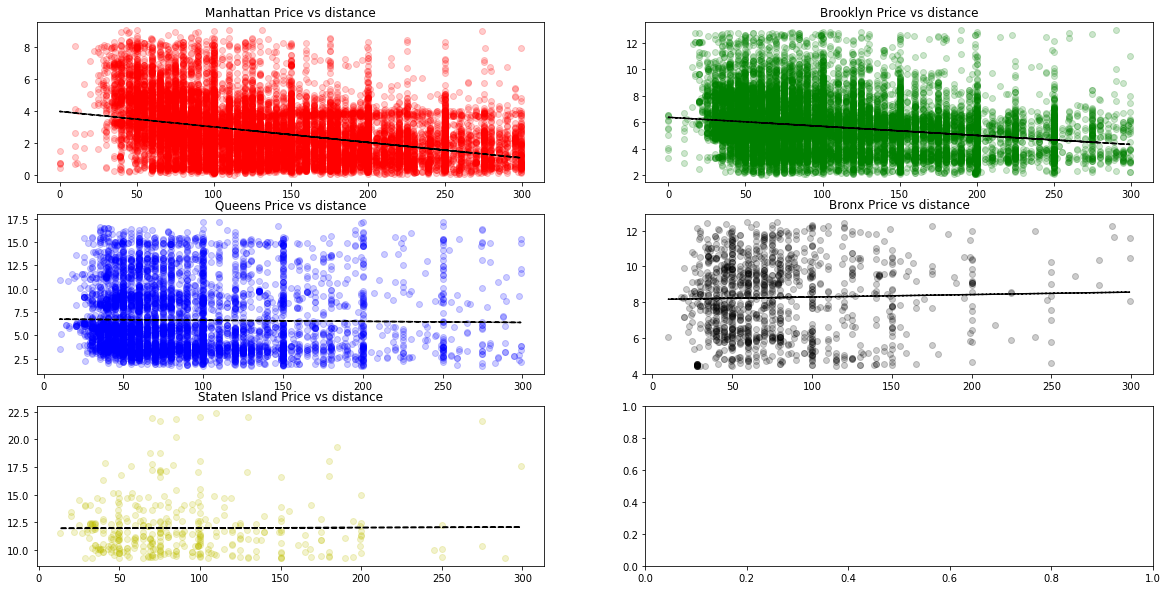

In [24]:
plot_borough('Price', 'distance')

# Room Type Exploratory and Analysis

In [25]:
# Creating Dataframes for each room type
EntireHome = df[df['Room_Type']=='Entire home/apt']
PrivateRoom = df[df['Room_Type']=='Private room']
SharedRoom = df[df['Room_Type'] == 'Shared room']
HotelRoom = df[df['Room_Type'] == 'Hotel room']

In [26]:
# Plotting the distribution of the price in the 5 boroughs
def plot_histRoom(a):
    x1 = EntireHome[a]
    x2 = PrivateRoom[a]
    x3 = SharedRoom[a]
    x4 = HotelRoom[a]
    
    fig, axs = plt.subplots(2, 2, figsize=(20,10))   
    axs[0, 0].hist(x1, color = 'r', bins=50)
    axs[0, 0].set_title(f'Entire Home {a}')
    axs[0, 1].hist(x2, color = 'g', bins=50)
    axs[0, 1].set_title(f'Private Room {a}')
    axs[1, 0].hist(x3, color='b', bins=50)
    axs[1, 0].set_title(f'Shared Room {a}')
    axs[1, 1].hist(x4, color = 'k',  bins=50)
    axs[1, 1].set_title(f'Hotel Room {a}')

    return plt.show

<function matplotlib.pyplot.show(*args, **kw)>

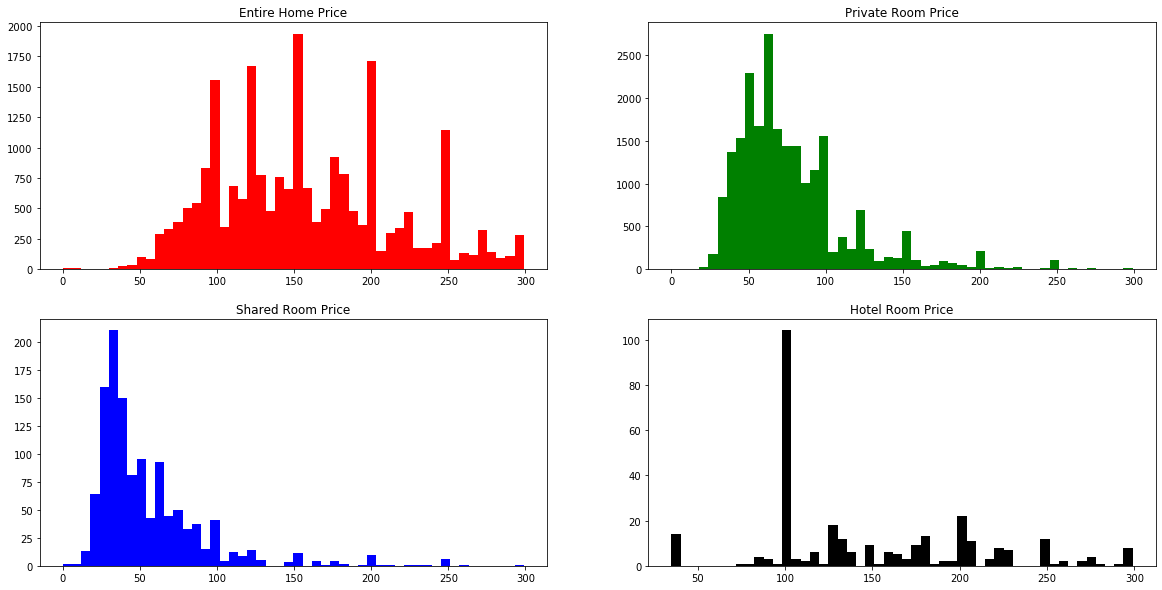

In [27]:
plot_histRoom('Price')

In [28]:
# Plotting the distribution of the price in the 5 borough
def plot_Room(a, b):
    x1 = EntireHome[a]
    y1 = EntireHome[b]
    x2 = PrivateRoom[a]
    y2 = PrivateRoom[b]
    x3 = SharedRoom[a]
    y3 = SharedRoom[b]
    x4 = HotelRoom[a]
    y4 = HotelRoom[b]

    fig, axs = plt.subplots(2, 2, figsize=(20,10))   
    axs[0, 0].scatter(x1, y1, color = 'r', alpha = 0.2)
    z = np.polyfit(x1, y1, 1)
    p = np.poly1d(z)
    axs[0, 0].plot(x1,p(x1),"k--")
    axs[0, 0].set_title(f'EntireHome {a} vs {b}')
    axs[0, 1].scatter(x2, y2, color = 'g', alpha=0.2)
    z = np.polyfit(x2, y2, 1)
    p = np.poly1d(z)
    axs[0, 1].plot(x2,p(x2),"k--")
    axs[0, 1].set_title(f'PrivateRoom {a} vs {b}')
    axs[1, 0].scatter(x3, y3, color='b', alpha=0.2)
    z = np.polyfit(x3, y3, 1)
    p = np.poly1d(z)
    axs[1, 0].plot(x3,p(x3),"k--")
    axs[1, 0].set_title(f'SharedRoom {a} vs {b}')
    axs[1, 1].scatter(x4, y4, color = 'k',  alpha=0.2)
    z = np.polyfit(x4, y4, 1)
    p = np.poly1d(z)
    axs[1, 1].plot(x4,p(x4),"k--")
    axs[1, 1].set_title(f'HotelRoom {a} vs {b}')

    return plt.show

<function matplotlib.pyplot.show(*args, **kw)>

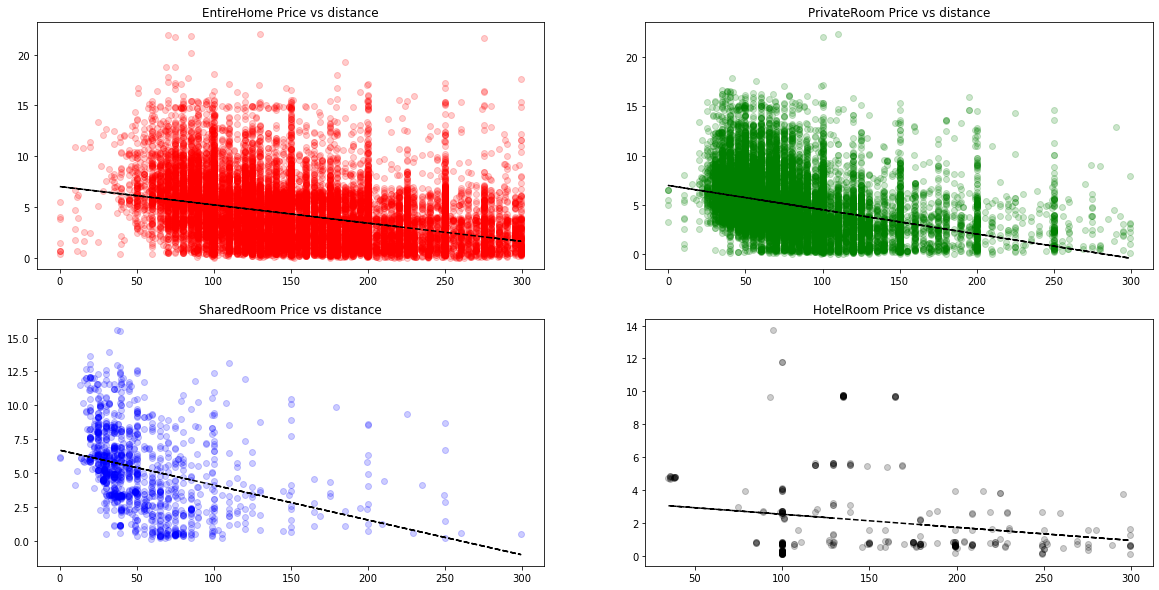

In [29]:
plot_Room('Price', 'distance')

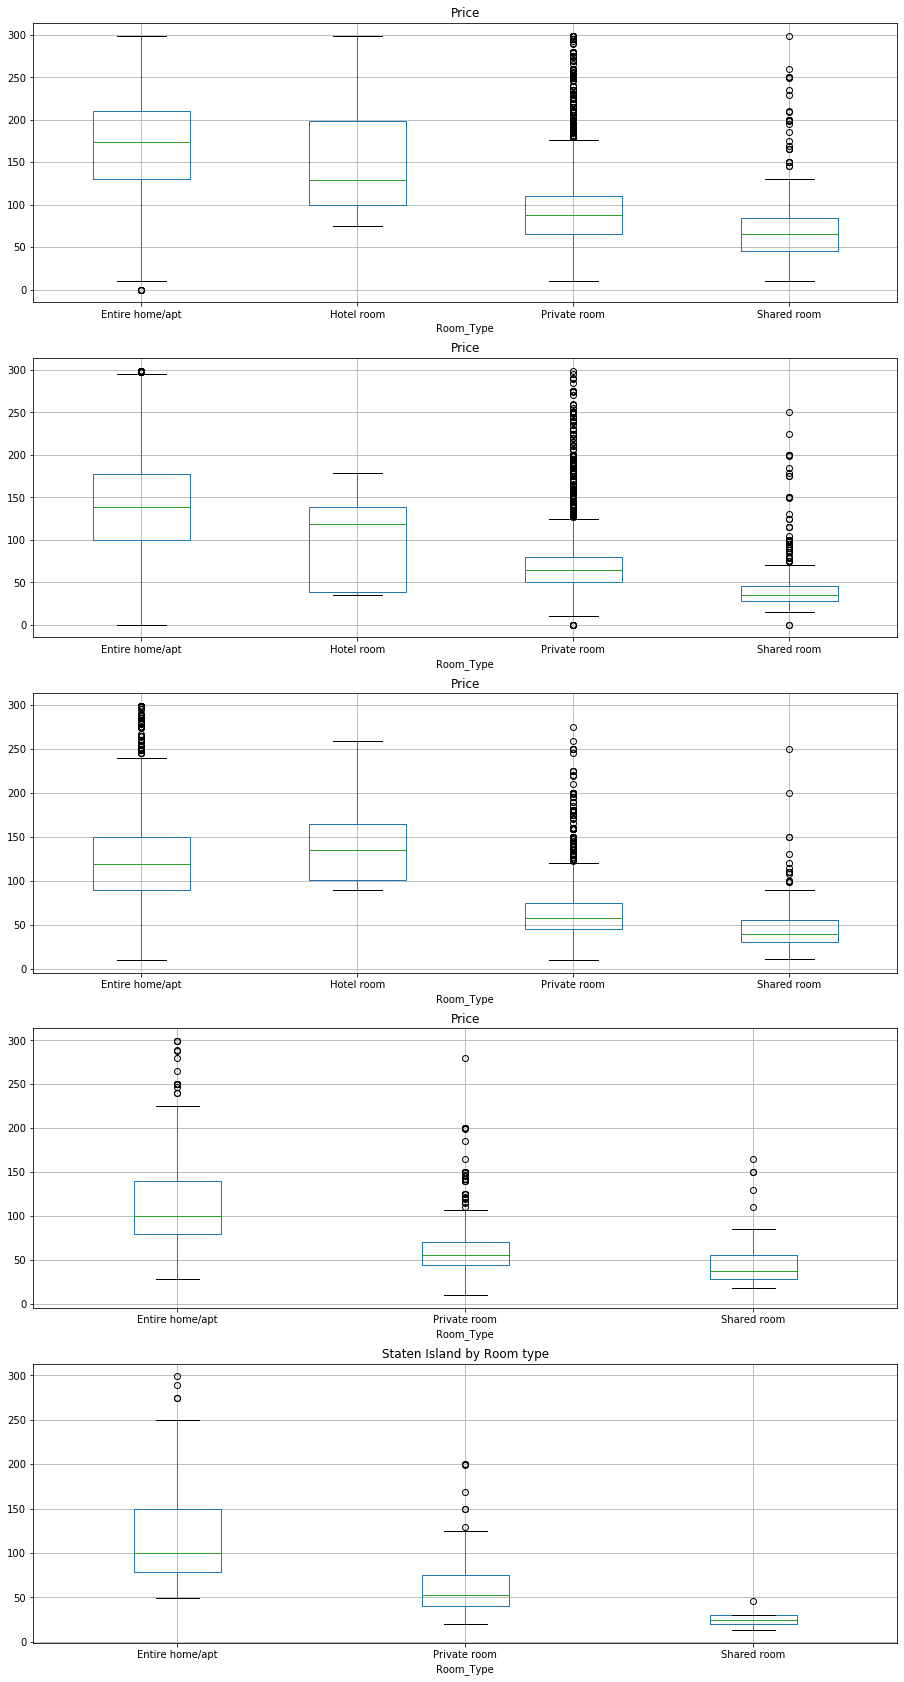

In [30]:
# Price Box plot in Manhattan per Room Type
fig, axs = plt.subplots(5, figsize=(15,30))
fig.suptitle('Vertically stacked subplots')

# axs[0].plot(x, y)
# axs[1].plot(x, -y)
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

Boroughs =['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
for i,el in enumerate(Boroughs):
    df[df['Borough'] == el].boxplot(column='Price', by="Room_Type", ax=axs.flatten()[i])
    plt.suptitle("")
    fig.suptitle('')
    plt.title(f"{Boroughs[i]} by Room type")


In [31]:
def boxplot_sorted(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    meds = df2.median().sort_values(ascending=False)
    df2[meds.index].boxplot(ax=axs.flatten()[i], rot=90)

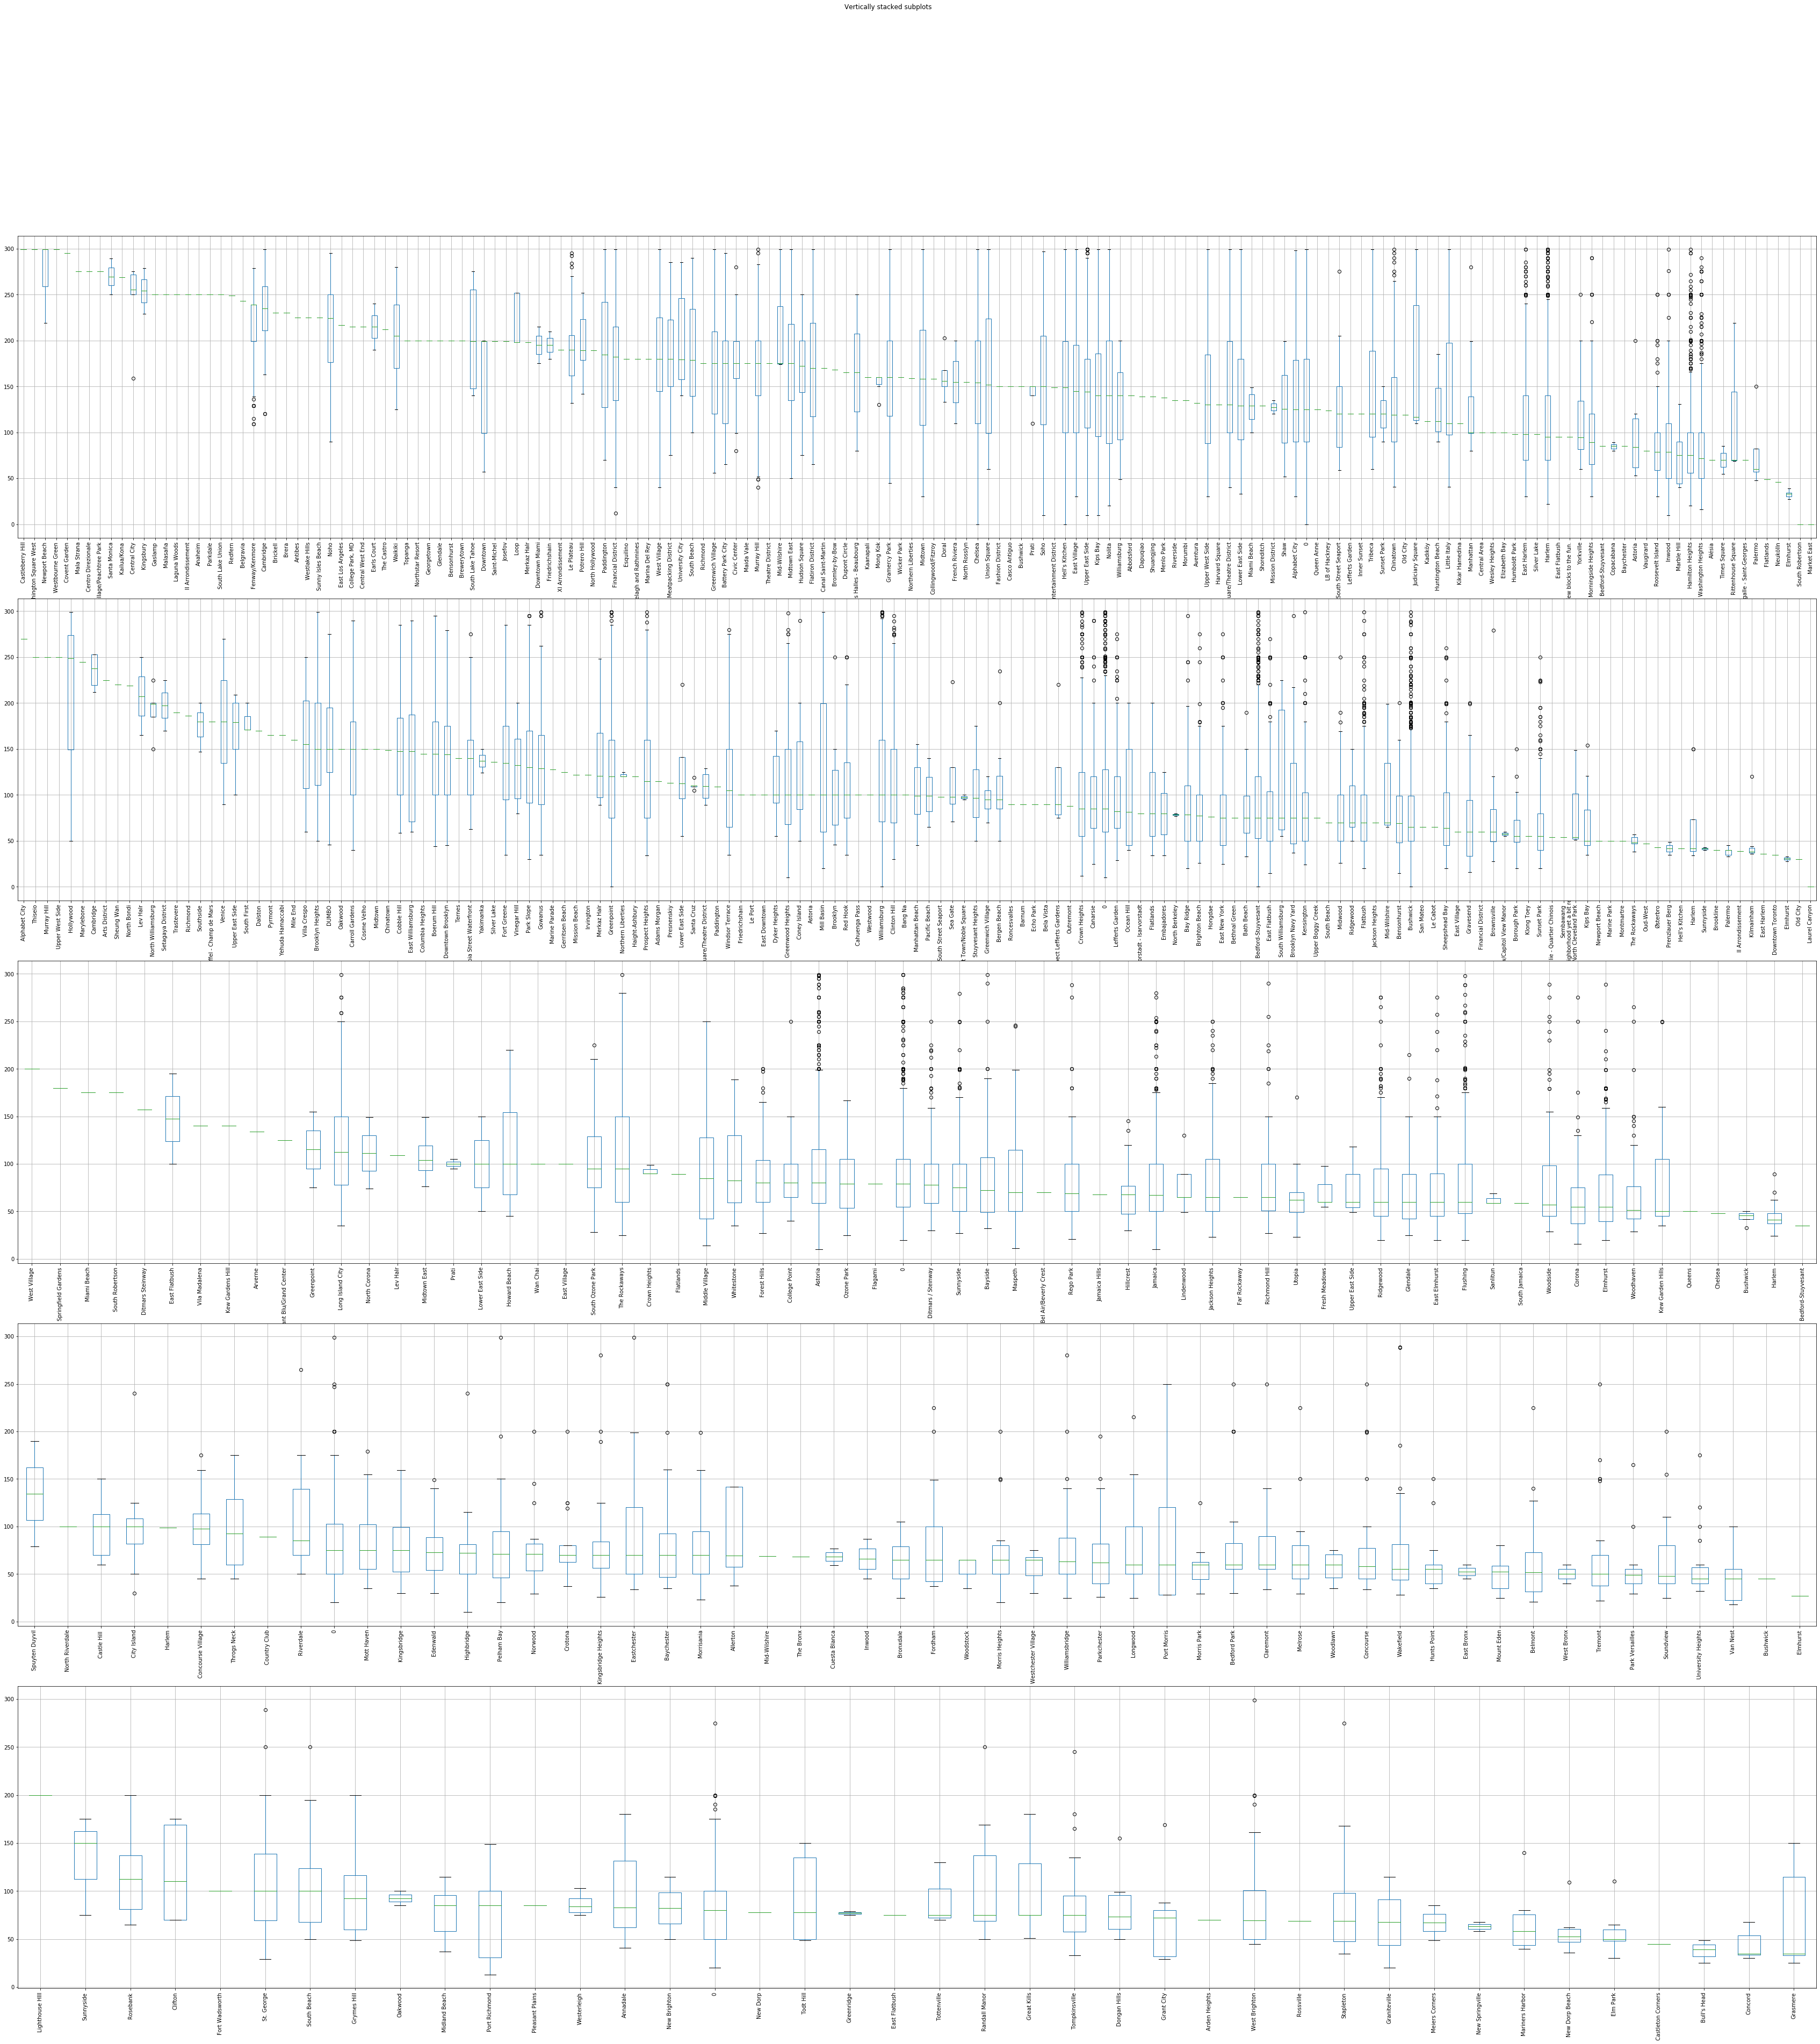

In [32]:
# Price Box plot in Manhattan per Room Type
fig, axs = plt.subplots(5, figsize=(60,60))
fig.suptitle('Vertically stacked subplots')

# axs[0].plot(x, y)
# axs[1].plot(x, -y)
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

Boroughs =['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
for i,el in enumerate(Boroughs):
    
    d = df[df['Borough'] == el]
    boxplot_sorted(d, by=["host_neighbourhood"], column="Price")
#     df[df['Borough'] == el].assign(m=df['Price'].median()).sort_values(by='m' ,ascending=0).drop('m', axis=1).boxplot(column='Price', by="host_neighbourhood", ax=axs.flatten()[i], rot= 90)
#     plt.suptitle("")
#     fig.suptitle('')
#     plt.title(f"{Boroughs[i]} by Room type")

# Preprocessing

In [33]:
# Column list by data type
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int32'): Index(['host_response_rate'], dtype='object'),
 dtype('int64'): Index(['accommodates', 'beds', 'security_deposit', 'cleaning_fee',
        'guests_included', 'availability_365', 'number_of_reviews',
        'Review_Rating', 'review_scores_cleanliness', 'review_scores_value'],
       dtype='object'),
 dtype('float64'): Index(['latitude', 'longitude', 'bathrooms', 'bedrooms', 'Price',
        'weekly_price', 'monthly_price', 'extra_people', 'distance'],
       dtype='object'),
 dtype('O'): Index(['Superhost', 'host_neighbourhood', 'Borough', 'Room_Type', 'bed_type',
        'location'],
       dtype='object')}

In [34]:
cat_cols =['Superhost', 'host_neighbourhood', 'Borough', 'Room_Type', 'bed_type',
        'location']

In [35]:
# Encoding the Categorical features
for cat in cat_cols:
    id_, name = pd.factorize(Manhattan[f'{cat}'])
    Manhattan[f'{cat}_num'] = id_
    

In [64]:
X = Manhattan.drop('Price', axis=1)
X = X.drop(cat_cols, axis=1)

y = Manhattan["Price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(19196, 25) (19196, 1)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [81]:
from sklearn.preprocessing import StandardScaler
#     Scaling the dataset
X_scaler = StandardScaler().fit(x_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(x_train)
X_test_scaled = X_scaler.transform(x_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [191]:
# Linear Regression models using the scaled data (Linear Regress, Lasso, Ridge, ElasticNet)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split

def linear(df, model):
    # Encoding the Categorical features
    for cat in cat_cols:
        id_, name = pd.factorize(Manhattan[f'{cat}'])
        Manhattan[f'{cat}_num'] = id_
    
    X = df.drop('Price', axis=1).drop(cat_cols, axis=1)
    y = df["Price"].values.reshape(-1, 1)
#     print(X.shape, y.shape)
#     Splitting the dataset training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
#     Scaling the dataset
    X_scaler = StandardScaler().fit(X_train)
    y_scaler = StandardScaler().fit(y_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    y_train_scaled = y_scaler.transform(y_train)
    y_test_scaled = y_scaler.transform(y_test)

    #     Instatiating a linear model
    if model != LinearRegression:
         model = model(alpha=.01).fit(X_train_scaled, y_train_scaled)
        
    else:
        model = model()
        model.fit(X_train_scaled, y_train_scaled)
    
#     Predicting on the scaled test data
    predictions = model.predict(X_test_scaled)
    MSE = mean_squared_error(y_test_scaled, predictions)
    r2 = model.score(X_test_scaled, y_test_scaled)
    
    print(f"MSE: {MSE}, R2: {r2}")
    return MSE

--------------Manhattan---------------
MSE: 0.5126934172126942, R2: 0.4895891091013562
MSE: 0.5126933530171398, R2: 0.48958917301111016
MSE: 0.5176790739376713, R2: 0.48462564866813074
MSE: 0.5160398579900307, R2: 0.48625756677770815
--------------Brooklyn---------------
MSE: 0.43717646997836573, R2: 0.5262304517422893
MSE: 0.4371763748400571, R2: 0.5262305548439807
MSE: 0.4404615810144949, R2: 0.5226703663341237
MSE: 0.4389656004143921, R2: 0.5242915653276288
--------------Queens---------------
MSE: 0.4134223415701285, R2: 0.5825713915644519
MSE: 0.41342245671753935, R2: 0.5825712753012058
MSE: 0.4205890416881407, R2: 0.5753352425794334
MSE: 0.41867167591092314, R2: 0.5772711885788832
--------------Bronx---------------
MSE: 0.6155535274375021, R2: 0.5314506322472861
MSE: 0.6154822980432263, R2: 0.5315048509076719
MSE: 0.6009224478067788, R2: 0.5425875729111687
MSE: 0.5984120591114355, R2: 0.544498440095885
--------------StatenIsland---------------
MSE: 0.5569581316591482, R2: 0.533512

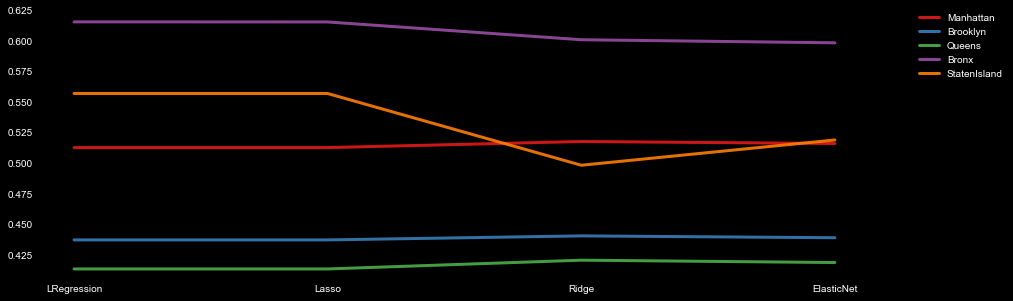

In [192]:
def linearPlot(dfs):
    models = ['LRegression', 'Lasso', 'Ridge', 'ElasticNet']
    fig, ax = plt.subplots(figsize=(15,5))
    # style
    plt.style.use('dark_background')

    # create a color palette
    palette = plt.get_cmap('Set1')
    num=0
    for name, d in zip(dfs, ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'StatenIsland']):
        print (f'--------------{d}---------------')
        values = [linear(name, model) for model in  [LinearRegression, Ridge, Lasso, ElasticNet]] 
        plt.plot(models, values, marker='', color=palette(num), linewidth=3, alpha=0.9, label=d)
        num +=1

    ax.grid(False)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    return plt.show()
dfs = [Manhattan, Brooklyn, Queens, Bronx, StatenIsland]
linearPlot(dfs)

# Decision Tree Classifier

In [167]:
def tree(df):
    for cat in cat_cols:
        id_, name = pd.factorize(df[f'{cat}'])
        df[f'{cat}_num'] = id_
    
    X = df.drop('Price', axis=1)
    X = X.drop(cat_cols, axis=1)
    y = df["Price"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
    rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    rf = rf.fit(x_train, y_train)
    score = rf.score(x_test, y_test)
    preds = rf.predict(x_test)
    mse = mean_squared_error
    price_error = round(np.sqrt(mse(preds, y_test)),2)
    print(f'Score: {score}, priceError : ${price_error}')
    return price_error

In [168]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
tree(Manhattan)
tree(Brooklyn)
tree(Queens)
tree(Bronx)
tree(StatenIsland)

Score: 0.6221220475033151, priceError : $39.65
Score: 0.6493691658957668, priceError : $33.75
Score: 0.5807035715061816, priceError : $32.28
Score: 0.3998603804433518, priceError : $35.16
Score: 0.44956861873718523, priceError : $38.76


38.76

Score: 0.6226973352940126, priceError : $39.62
Score: 0.6482710944181147, priceError : $33.8
Score: 0.5810369025501458, priceError : $32.27
Score: 0.4004595239780129, priceError : $35.14
Score: 0.4662098170732196, priceError : $38.17
Score: 0.6224706967165126, priceError : $39.63
Score: 0.6481306238663309, priceError : $33.81
Score: 0.5831247833636835, priceError : $32.19
Score: 0.39566778825950527, priceError : $35.28
Score: 0.48685436659859793, priceError : $37.43
Score: 0.6228723187242731, priceError : $39.61
Score: 0.6477525958100738, priceError : $33.83
Score: 0.5820926378176554, priceError : $32.23
Score: 0.40390437857406514, priceError : $35.04
Score: 0.4654416932292715, priceError : $38.2


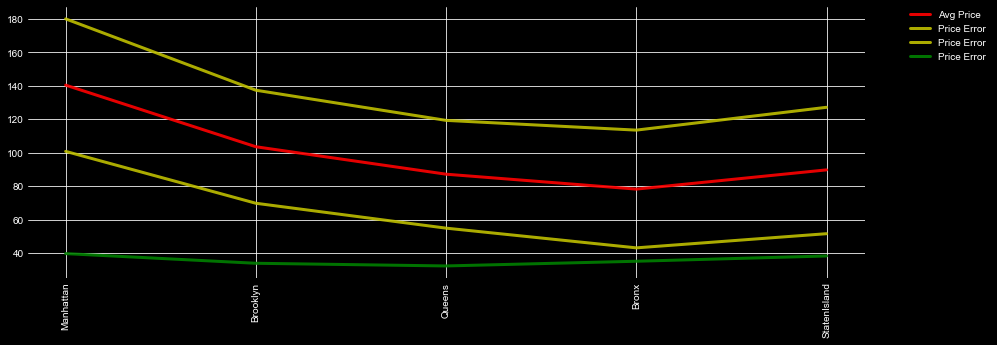

In [180]:
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'StatenIsland']
dfs = [Manhattan, Brooklyn, Queens, Bronx, StatenIsland]
avg_price = [df['Price'].mean() for df in dfs]
PriceErrorLo = [df['Price'].mean() - tree(df) for df in dfs]
PriceErrorUp = [df['Price'].mean() + tree(df) for df in dfs]
PriceError = [tree(df) for df in dfs]

# Plotting the feautres by importance
fig, ax = plt.subplots(figsize=(15,5))
# style
plt.style.use('dark_background')
plt.plot(boroughs, avg_price, marker='', color='r', linewidth=3, alpha=0.9, label='Avg Price')
plt.plot(boroughs, PriceErrorLo, marker='', color='y', linewidth=3, alpha=0.9, label='Price Error Lower')
plt.plot(boroughs, PriceErrorUp, marker='', color='y', linewidth=3, alpha=0.9, label='Price Error Upper')
plt.plot(boroughs, PriceError, marker='', color='g', linewidth=3, alpha=0.9, label='Price Error')
plt.xticks(rotation='vertical')   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [162]:
avg_price

[140.38903938320485,
 103.52696697303303,
 87.10927698910531,
 78.18618365627633,
 89.68937329700273]

In [48]:
# # Using Decision Tree Model
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(x_train, y_train)
# clf.score(x_test, y_test)

0.07473958333333333

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf = rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.6205280860194003

In [172]:
feature_names = X.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.37808243551769566, 'Room_Type_num'),
 (0.08776378434068217, 'longitude'),
 (0.07873692431859194, 'latitude'),
 (0.06526344241010529, 'accommodates'),
 (0.05230967739633713, 'location_num'),
 (0.04758757406098227, 'distance'),
 (0.04206554090422834, 'cleaning_fee'),
 (0.03151119417536228, 'host_neighbourhood_num'),
 (0.031054866620575498, 'availability_365'),
 (0.025916262810352243, 'number_of_reviews'),
 (0.019089422638098378, 'security_deposit'),
 (0.018746024512027858, 'bedrooms'),
 (0.01871133751500105, 'extra_people'),
 (0.01739265876045296, 'Review_Rating'),
 (0.014730692330599782, 'weekly_price'),
 (0.01400882771305394, 'host_response_rate'),
 (0.009874491991933283, 'bathrooms'),
 (0.009816762883609626, 'beds'),
 (0.009396219897373404, 'guests_included'),
 (0.008739135008148961, 'monthly_price'),
 (0.007959652966138651, 'review_scores_cleanliness'),
 (0.006436226140126803, 'review_scores_value'),
 (0.003947097370056237, 'Superhost_num'),
 (0.0008597477184662694, 'bed_type_num

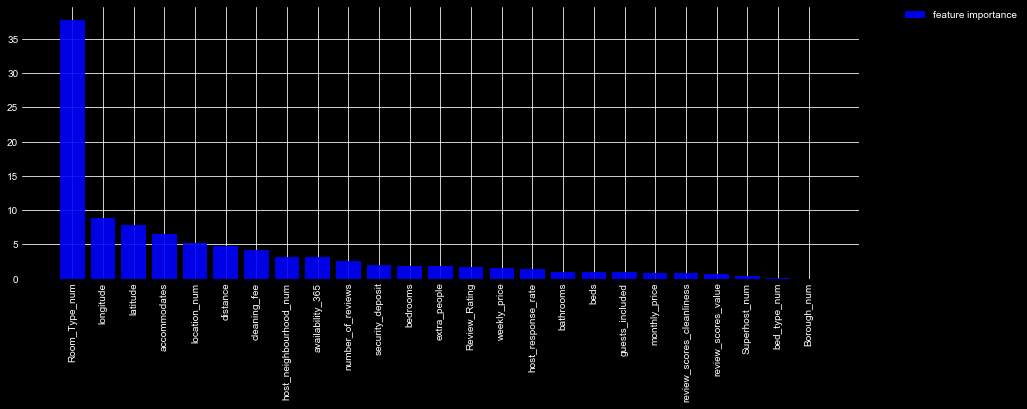

In [175]:
# Plotting the feautres by importance
fig, ax = plt.subplots(figsize=(15,5))
# style
list_ = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

f = list(zip(*list_))[1]
fi = list(zip(*list_))[0]
plt.style.use('dark_background')
percent = [x*100 for x in fi]
plt.bar(f, percent, color='b', linewidth=3, alpha=0.9, label='feature importance')
plt.xticks(rotation='vertical')   
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# Room Type Level Analysis

--------------Manhattan---------------
MSE: 0.6624571397679246, R2: 0.3452083044686224
MSE: 0.6624574248571024, R2: 0.3452080226782772
MSE: 0.6760506886685415, R2: 0.3317720496551536
MSE: 0.6694814392343489, R2: 0.3382652847901698
--------------Brooklyn---------------
MSE: 0.8141293994518054, R2: 0.2008149636905704
MSE: 0.8141292892070727, R2: 0.2008150719116232
MSE: 0.8234752967344061, R2: 0.19164062203902366
MSE: 0.8191989091829799, R2: 0.19583851114960116
--------------Queens---------------
MSE: 0.9579829444127248, R2: 0.1490865457633087
MSE: 0.9579766246640987, R2: 0.1490921591817569
MSE: 0.9595241637623594, R2: 0.14771758164115723
MSE: 0.9574234523156075, R2: 0.14958350591876113
--------------Bronx---------------
MSE: 1.113131151478827, R2: 0.12363614486051511
MSE: 1.1131818103123594, R2: 0.12359626135658787
MSE: 1.1247177546371199, R2: 0.11451405695714179
MSE: 1.1255764442412024, R2: 0.11383801394926962
--------------StatenIsland---------------
MSE: 1.379412290448495, R2: 0.15178

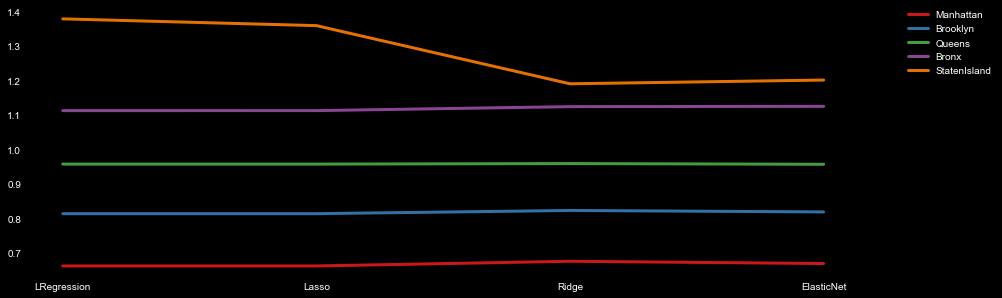

In [194]:
# plotting Private Room Linear regression models
def df_b(df, b):
    df = df[df['Borough'] ==b]
    return df
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
dfs = [df_b(PrivateRoom, b) for b in boroughs]

# dfs = [Manhattan, Brooklyn, Queens, Bronx, StatenIsland]
linearPlot(dfs)

In [195]:
boroughs = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']
dfs = [df_b(PrivateRoom, b) for b in boroughs]
for df in dfs:
    tree(df)

Score: 0.4280905190783864, priceError : $32.84
Score: 0.30198941424813863, priceError : $26.41
Score: 0.28560377679797067, priceError : $26.13
Score: -0.017587339127400847, priceError : $33.61
Score: 0.28437311770552687, priceError : $21.02


In [197]:
# Using Decision Tree Model for Private Room
# from sklearn import tree
# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(x_train, y_train)
# clf.score(x_test, y_test)

from sklearn.ensemble import RandomForestRegressor
for df in dfs:
    
    for cat in cat_cols:
        id_, name = pd.factorize(df[f'{cat}'])
        df[f'{cat}_num'] = id_

    X = df.drop('Price', axis=1).drop(cat_cols, axis=1)
    y = df["Price"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
    rf = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    rf = rf.fit(x_train, y_train)
    print(rf.score(x_test, y_test))
#     feature_names = X.columns
#     sorted(zip(rf.feature_importances_, feature_names), reverse=True)

0.43129217481409343
0.3054889477593788
0.2886700855598603
-0.0536841757985942
0.31060055586464697
